In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
filePath = '/Users/stefaniak.9/Library/CloudStorage/OneDrive-TheOhioStateUniversity/ERDOS/DataScience/PROEJCT/SurvivalAtBirth_Global/Data_Organization/CSV_Uploads/Maria/'
fileName = 'https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Maria/gdp_WORLDBANK_2022.07.11.csv'#'gdp_WORLDBANK_2022.07.11.csv'
df_GDP = pd.read_csv(fileName, index_col=0)
df_GDP = df_GDP.reset_index()
df_GDP = df_GDP.dropna(subset=["Country Code"])
df_GDP = df_GDP.loc[:, ~df_GDP.columns.str.contains("Unnamed")]
df_GDP = df_GDP.iloc[1:].reset_index(drop=True)
df_GDP.rename(columns={"Country Code": "Country"}, inplace=True)
df_GDP.columns = df_GDP.columns.str.replace("YR", "", regex=False)
df_GDP


,Country,Series Name,1985,1986,1987,1988,1989,1990,1991,1992,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,GDP per capita,3401.71,3542.89,3318.44,3024.42,2742.98,2516.71,2133.93,1931.08,...,2075.49,2116.47,2102.38,2068.27,2057.07,2058.40,2033.80,2065.04,1970.56,NaN
1,ALB,GDP per capita,5214.67,5403.16,5254.60,5083.17,5435.11,4827.03,3496.37,3264.83,...,11227.97,11361.27,11586.83,11878.45,12291.86,12770.96,13317.09,13653.20,13253.73,14520.11
2,DZA,GDP per capita,9669.76,9426.51,9095.98,8758.49,8902.50,8746.34,8431.38,8383.76,...,11233.52,11319.08,11512.69,11696.95,11826.15,11737.40,11630.68,11521.98,10735.38,10957.16
3,ASM,GDP per capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,GDP per capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,VIR,GDP per capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,PSE,GDP per capita,3492.91,3419.94,3349.09,3274.01,3193.64,3104.81,2843.82,3368.71,...,5985.68,6118.26,5967.07,6048.98,6438.93,6401.74,6318.21,6245.45,5402.54,5643.07
214,YEM,GDP per capita,5611.50,5545.50,5487.36,5422.93,5341.22,6089.37,6161.06,6331.17,...,6863.33,7001.57,6805.33,4775.49,4221.00,3910.96,3848.60,3813.72,3411.87,3268.69
215,ZMB,GDP per capita,2348.39,2291.31,2280.55,2351.87,2261.74,2190.18,2133.69,2045.97,...,3339.27,3399.70,3450.04,3443.55,3467.89,3485.02,3521.55,3470.44,3277.82,3298.63


In [48]:
#fileName = 'HistoryMortalityPopulation.csv'
fileName = 'https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Maria/HistoryMortalityPopulation.csv'
df_Population = pd.read_csv(fileName)
df_Population = df_Population.iloc[1:].reset_index(drop=True)
df_Population = df_Population.dropna(subset=["Estimated maternal mortality ratio"])
df_Population["Estimated maternal mortality ratio"] = pd.to_numeric(df_Population["Estimated maternal mortality ratio"], errors='coerce')
#df_Population["Estimated maternal mortality ratio"] = pd.to_numeric(df_Population["Estimated maternal mortality ratio"], errors='coerce')
df_Population.rename(columns={"Estimated maternal mortality ratio": "Mortality_Ratio"}, inplace=True)
df_Population.rename(columns={"Population (historical)": "Population"}, inplace=True)
df_Population.rename(columns={"Entity": "Country"}, inplace=True)

df_Population.head()

,Country,Year,Mortality_Ratio,Population
0,AFG,1985,1910.3416,11426855
1,AFG,1986,1602.9429,11420074
2,AFG,1987,1586.7214,11387824
3,AFG,1988,1413.9326,11523299
4,AFG,1989,1382.7299,11874088


In [34]:
# change in the mortality Ratio between 1985 and 2020
df_MortalityHistory = df_Population.pivot(index = "Country", columns="Year", values="Mortality_Ratio")
df_MortalityHistory.reset_index(inplace=True)
df_MortalityHistory.reset_index(drop=True)
df_MortalityHistory.head()

Year,Country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,1910.341600,1602.942900,1586.721400,1413.932600,1382.729900,1377.858600,1392.785900,1451.594000,1368.816200,...,883.713900,833.477200,820.685360,785.354060,775.692700,749.815700,681.807560,663.427500,644.272600,620.407530
1,AGO,1097.974700,1084.063100,1015.036000,1014.127870,1099.853900,1101.505700,1057.425800,1144.283900,1096.306500,...,334.731300,304.040400,291.413970,291.747340,273.596530,269.823580,252.804860,233.096250,227.686970,221.906510
2,ALB,47.698692,41.964490,39.203156,36.728065,34.942030,32.874947,29.074210,27.674513,26.515451,...,8.045227,7.796703,7.215363,7.009861,6.878285,6.656085,6.689698,5.429293,5.305023,8.276446
3,ARE,21.615992,21.568401,20.232410,20.631084,21.127855,21.199984,21.353664,23.128319,21.835316,...,9.511198,8.604210,8.800449,9.054851,9.385999,8.338153,8.591664,9.046694,9.432062,9.340701
4,ARG,97.925995,95.421936,93.700874,92.160490,90.125786,87.814260,82.481020,81.170950,78.660240,...,50.251950,45.024837,43.346664,41.764570,39.335068,40.259438,38.243805,33.944830,32.602604,44.900078


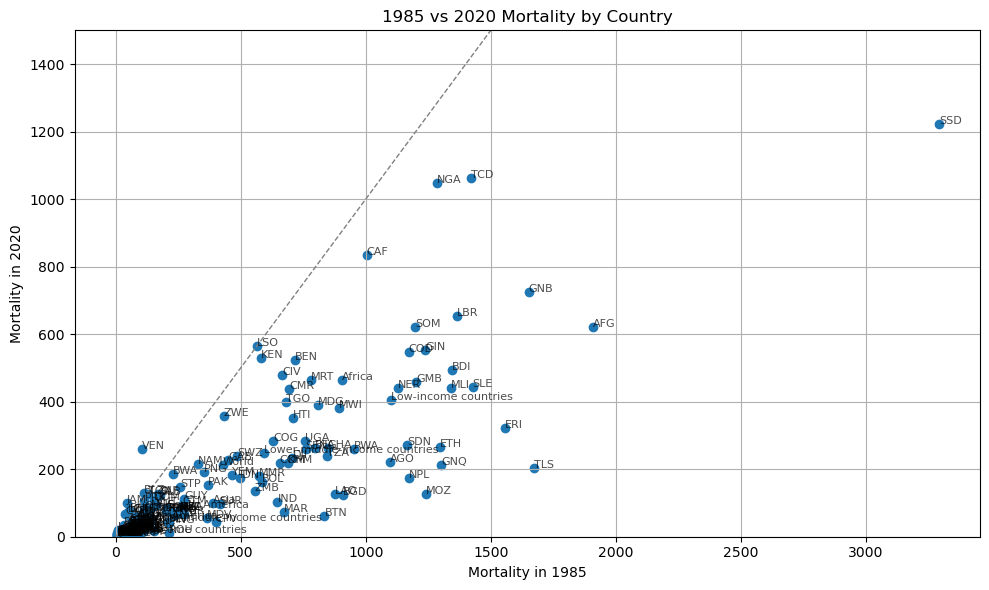

In [39]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df_MortalityHistory["1985"], df_MortalityHistory["2020"])

# Add annotations
for i, row in df_MortalityHistory.iterrows():
    plt.text(row["1985"], row["2020"], row["Country"], fontsize=8, alpha=0.7)

# Add diagonal reference line (k = y = x)
min_val = min(df_MortalityHistory["2020"].min(), df_MortalityHistory["1985"].min())
max_val = max(df_MortalityHistory["2020"].max(), df_MortalityHistory["1985"].max())
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=1, label='y = x')

# Add labels and title
plt.ylim(0, 1500)
plt.xlabel("Mortality in 1985")
plt.ylabel("Mortality in 2020")
plt.title("1985 vs 2020 Mortality by Country")
plt.grid(True)
plt.tight_layout()
plt.show()

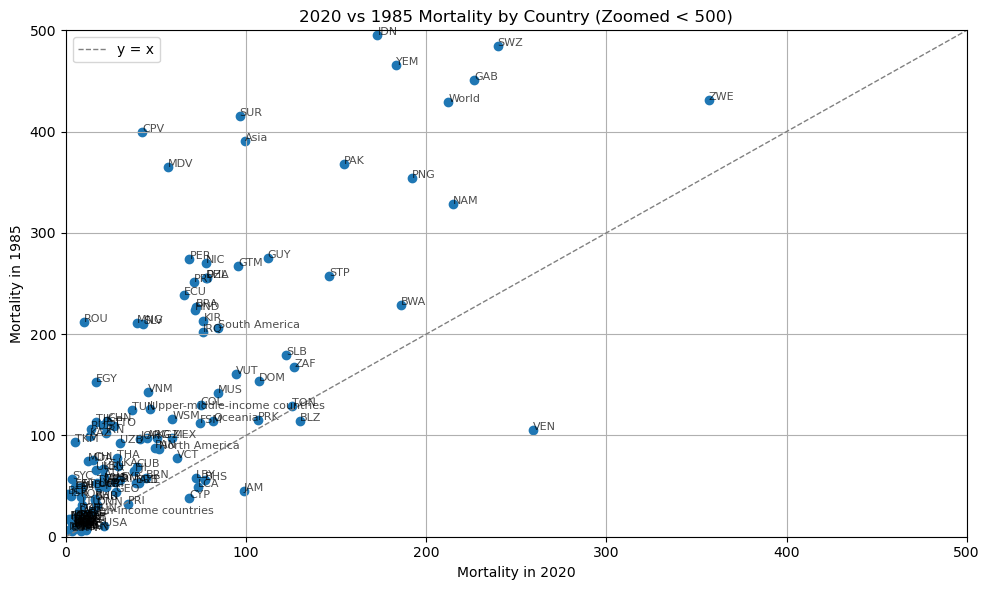

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df_MortalityHistory["2020"], df_MortalityHistory["1985"])

# Add annotations
for i, row in df_MortalityHistory.iterrows():
    if row["2020"] < 500 and row["1985"] < 500:  # Only annotate visible points
        plt.text(row["2020"], row["1985"], row["Country"], fontsize=8, alpha=0.7)

# Add diagonal reference line
plt.plot([0, 500], [0, 500], color='gray', linestyle='--', linewidth=1, label='y = x')

# Set axis limits
plt.xlim(0, 500)
plt.ylim(0, 500)

# Add labels and title
plt.xlabel("Mortality in 2020")
plt.ylabel("Mortality in 1985")
plt.title("2020 vs 1985 Mortality by Country (Zoomed < 500)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

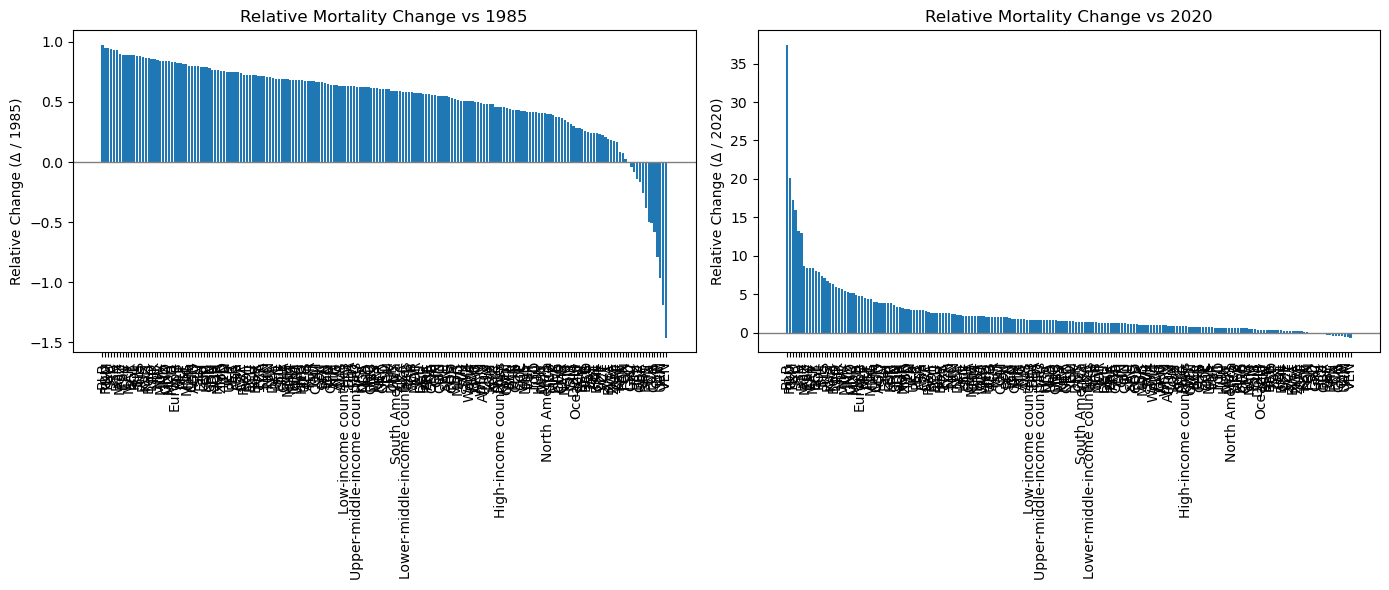

In [43]:
# Compute the difference
df_MortalityHistory["Difference"] = df_MortalityHistory["1985"] - df_MortalityHistory["2020"]
df_MortalityHistory["Diff_vs_1985"] = df_MortalityHistory["Difference"] / df_MortalityHistory["1985"]
df_MortalityHistory["Diff_vs_2020"] = df_MortalityHistory["Difference"] / df_MortalityHistory["2020"]

# Sort by difference vs 1985 for a clean bar order
df_sorted = df_MortalityHistory.sort_values("Diff_vs_1985", ascending=False)

# Plot
plt.figure(figsize=(14, 6))

# First subplot: Difference relative to 1985
plt.subplot(1, 2, 1)
plt.bar(df_sorted["Country"], df_sorted["Diff_vs_1985"])
plt.xticks(rotation=90)
plt.ylabel("Relative Change (Δ / 1985)")
plt.title("Relative Mortality Change vs 1985")
plt.axhline(0, color='gray', linewidth=1)

# Second subplot: Difference relative to 2020
plt.subplot(1, 2, 2)
plt.bar(df_sorted["Country"], df_sorted["Diff_vs_2020"])
plt.xticks(rotation=90)
plt.ylabel("Relative Change (Δ / 2020)")
plt.title("Relative Mortality Change vs 2020")
plt.axhline(0, color='gray', linewidth=1)

plt.tight_layout()
plt.show()

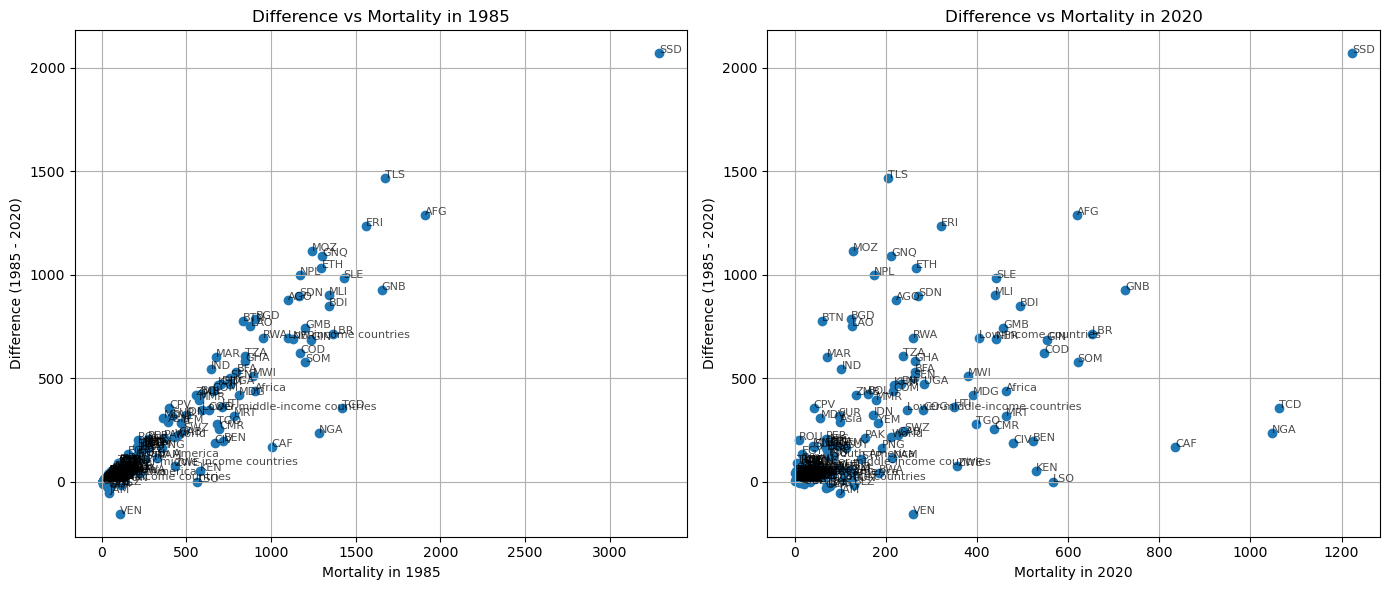

In [44]:
# Compute the difference if not already present
df_MortalityHistory["Difference"] = df_MortalityHistory["1985"] - df_MortalityHistory["2020"]

plt.figure(figsize=(14, 6))

# Plot 1: Difference vs 1985
plt.subplot(1, 2, 1)
plt.scatter(df_MortalityHistory["1985"], df_MortalityHistory["Difference"])
for _, row in df_MortalityHistory.iterrows():
    plt.text(row["1985"], row["Difference"], row["Country"], fontsize=8, alpha=0.7)
plt.xlabel("Mortality in 1985")
plt.ylabel("Difference (1985 - 2020)")
plt.title("Difference vs Mortality in 1985")
plt.grid(True)

# Plot 2: Difference vs 2020
plt.subplot(1, 2, 2)
plt.scatter(df_MortalityHistory["2020"], df_MortalityHistory["Difference"])
for _, row in df_MortalityHistory.iterrows():
    plt.text(row["2020"], row["Difference"], row["Country"], fontsize=8, alpha=0.7)
plt.xlabel("Mortality in 2020")
plt.ylabel("Difference (1985 - 2020)")
plt.title("Difference vs Mortality in 2020")
plt.grid(True)

plt.tight_layout()
plt.show()

In [45]:
import plotly.express as px

# Compute the difference if not already present
df_MortalityHistory["Difference"] = df_MortalityHistory["1985"] - df_MortalityHistory["2020"]

# Interactive scatter plot: Difference vs 1985
fig1 = px.scatter(
    df_MortalityHistory,
    x="1985",
    y="Difference",
    color="Country",  # or any other categorical or numerical column
    hover_name="Country",
    title="Difference vs Mortality in 1985",
    labels={"1985": "Mortality in 1985", "Difference": "Difference (1985 - 2020)"},
    width=700,
    height=500
)
fig1.show()

# Interactive scatter plot: Difference vs 2020
fig2 = px.scatter(
    df_MortalityHistory,
    x="2020",
    y="Difference",
    color="Country",  # Can change to region or income if available
    hover_name="Country",
    title="Difference vs Mortality in 2020",
    labels={"2020": "Mortality in 2020", "Difference": "Difference (1985 - 2020)"},
    width=700,
    height=500
)
fig2.show()